# Data exploration
Temperature

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

In [2]:
# climato check
clim = xr.open_dataset("/home/majanvie/scratch/data/raw/obs/climato/2m_temperature_1996_2017_month2_lead3.nc")
clim

<xarray.Dataset>
Dimensions:    (date: 29, latitude: 121, longitude: 240)
Coordinates:
  * longitude  (longitude) float64 0.0 1.5 3.0 4.5 ... 354.0 355.5 357.0 358.5
  * latitude   (latitude) float64 -90.0 -88.5 -87.0 -85.5 ... 87.0 88.5 90.0
  * date       (date) object '02-01' '02-04' '02-08' ... '02-12' '02-19' '02-26'
Data variables:
    mu         (date, latitude, longitude) float32 ...
    sigma      (date, latitude, longitude) float32 ...

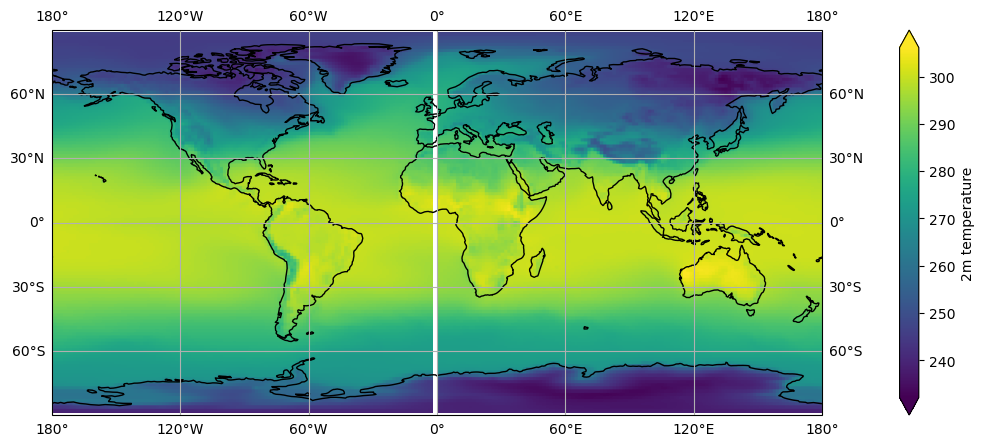

In [7]:
plot_map(lats, lons, clim["mu"].isel(date=0),"2m temperature")

## Mean of ensemble

In [4]:
folder = "/home/majanvie/scratch/data/train/EMOS"
file_path = "data_hindcast=0_forecast=0_20.nc"
mean_path = f"{folder}/mean/{file_path}"
std_path = f"{folder}/std/{file_path}"
ds_mean = xr.open_dataset(mean_path)
ds_mean = ds_mean["2m_temperature"]
ds_std = xr.open_dataset(std_path)
ds_std = ds_std["2m_temperature"]

In [14]:
ds.prediction_timedelta

<xarray.DataArray 'prediction_timedelta' (prediction_timedelta: 7)>
array([               0,  604800000000000, 1209600000000000, 1814400000000000,
       2419200000000000, 3024000000000000, 3369600000000000],
      dtype='timedelta64[ns]')
Coordinates:
    hindcast_year         int32 ...
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 0 days ... 3...
    level                 int32 ...
Attributes:
    long_name:      time since forecast_reference_time
    standard_name:  forecast_period

In [5]:
lats = ds_mean["latitude"].values
lons = ds_mean["longitude"].values

In [3]:
def plot_map(lats, lons, data, name):
    plt.figure(figsize=(20, 5))
    buffer = 0.01
    ax = plt.axes(projection=ccrs.PlateCarree())
    # Calculate extent with buffer to avoid identical limits
    lon_min, lon_max = lons.min(), lons.max()
    lat_min, lat_max = lats.min(), lats.max()
    # extent = [lon_min, lon_max, lat_min - buffer, lat_max + buffer]
    
    # ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.coastlines()
    
    # Plot data
    im = ax.imshow(data, origin='lower', extent=[lon_min, lon_max, lat_min, lat_max], transform=ccrs.PlateCarree(), cmap='viridis')
    plt.colorbar(im, label=name, extend='both')
    ax.gridlines(draw_labels=True)
    plt.show()
    

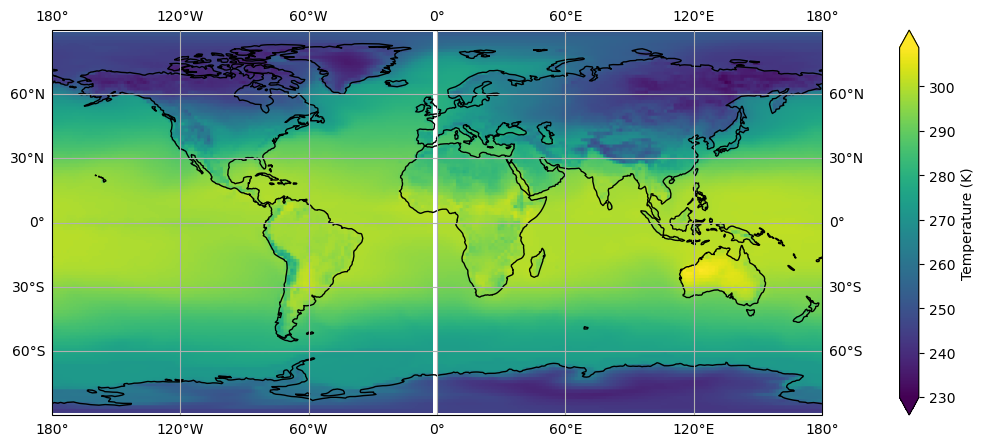

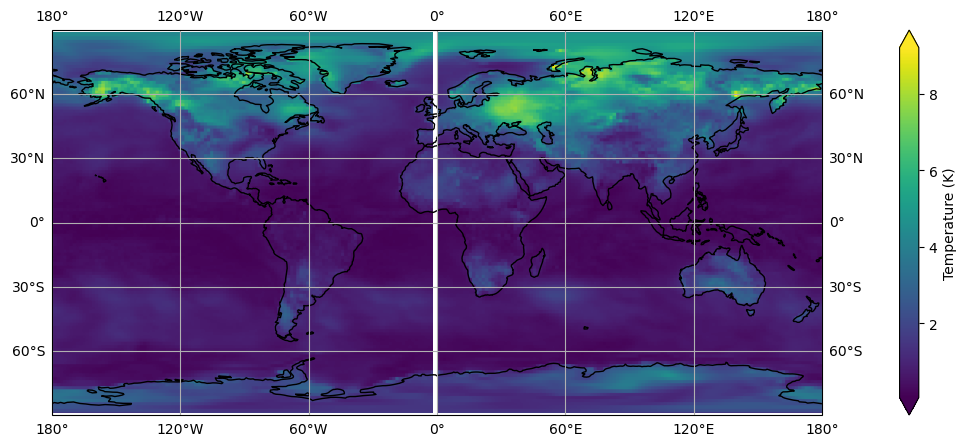

In [10]:
plot_map(lats,lons,ds_mean.isel(forecast_time=0, prediction_timedelta=2).values, "Temperature (K)")
plot_map(lats,lons,ds_std.isel(forecast_time=0, prediction_timedelta=2).values, "Temperature (K)")

(array([[56., 44., 13., ...,  0.,  0.,  0.],
        [54., 47., 11., ...,  0.,  0.,  0.],
        [57., 44., 10., ...,  0.,  0.,  0.],
        ...,
        [52., 59.,  1., ...,  0.,  0.,  0.],
        [50., 54.,  8., ...,  0.,  0.,  0.],
        [53., 54.,  5., ...,  0.,  0.,  0.]]),
 array([0.05534304, 0.97030902, 1.88527501, 2.80024099, 3.71520686,
        4.63017273, 5.54513884, 6.46010494, 7.37507105, 8.29003716,
        9.20500278]),
 <a list of 240 BarContainer objects>)

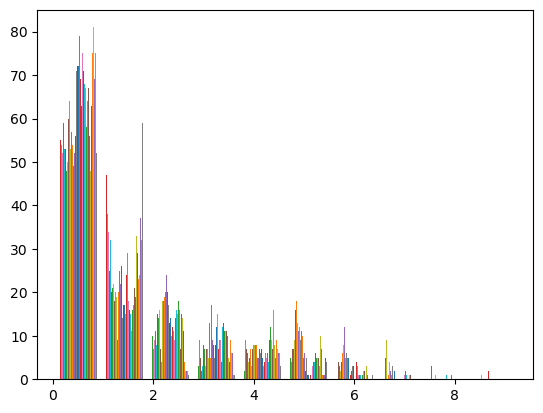

In [12]:
std_00 = ds_std.isel(forecast_time=0, prediction_timedelta=2).values
plt.hist(std_00)

In [13]:
std_00

array([[1.6357241, 1.6357241, 1.6357241, ..., 1.6357241, 1.6357241,
        1.6357241],
       [1.4841791, 1.4824944, 1.48139  , ..., 1.4851345, 1.4845785,
        1.4841301],
       [1.4531996, 1.4403446, 1.4278688, ..., 1.4665538, 1.4612559,
        1.4568341],
       ...,
       [4.7138367, 4.735979 , 4.760292 , ..., 4.6120267, 4.6437354,
        4.6776423],
       [4.4790115, 4.487186 , 4.4956183, ..., 4.456687 , 4.4636636,
        4.471366 ],
       [4.3406153, 4.3406153, 4.3406153, ..., 4.3406153, 4.3406153,
        4.3406153]], dtype=float32)